# Проект «В один клик»


Задача состоит в помощи интернет-магазину «В один клик», увеличить покупательскую активность постоянных клиентов, применяя персонализированные предложения, построенные на основе анализа данных и моделирования.

___________________________________________________________________________________________________________________

# План работы:

**Шаг 1. Загрузка данных**

    1.1. Загрузить данные из файлов. Учитывать, что в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.
    1.2. Проверить, соответствуют ли данные описанию задачи. Убедиться, что данные загружены корректно, но пока не объединять их.
    
**Шаг 2. Предобработка данных**

    2.1. Проверить данные на наличие пропусков и дубликатов.
    2.2. Убедиться в корректности типов данных для каждого признака.
    2.3. При необходимости обработать или исправить выявленные проблемы. Оставить названия столбцов на кириллице.

**Шаг 3. Исследовательский анализ данных**

    3.1. Провести исследовательский анализ данных для каждой таблицы.
    3.2. Отобрать только тех клиентов, которые совершали покупки в последние три месяца.
    3.3. Построить графики для анализа и сделать выводы о характеристиках данных.

**Шаг 4. Объединение таблиц**

    4.1. Объединить данные из файлов market_file.csv, market_money.csv и market_time.csv.
    4.2. Разделить совмещённые данные о выручке и времени на сайте по периодам, добавив отдельные столбцы для каждого периода.
    4.3. Исключить данные из файла money.csv, так как они не нужны для моделирования.

**Шаг 5. Корреляционный анализ**

    5.1. Провести корреляционный анализ количественных признаков в итоговой таблице.
    5.2. Проверить данные на наличие мультиколлинеарности и при необходимости устранить её.
    5.3. Построить графики для визуализации взаимосвязей между признаками.

**Шаг 6. Использование пайплайнов**

    6.1. Подготовить данные для моделирования:
- Использовать ColumnTransformer для обработки данных.
- Кодировать категориальные признаки с помощью двух разных кодировщиков.
- Масштабировать количественные признаки с использованием двух разных скейлеров.
    6.2. Обучить четыре модели:
- KNeighborsClassifier()
- DecisionTreeClassifier()
- LogisticRegression()
- SVC()
- Для каждой модели подобрать хотя бы один гиперпараметр.
    6.3. Выбрать метрику для оценки качества моделей и аргументировать свой выбор.
    6.4. Определить лучшую модель:
- Настроить отдельные пайплайны для каждой модели или создать общий пайплайн с автоматическим выбором лучшей модели.

**Шаг 7. Анализ важности признаков**

    7.1. Провести анализ важности признаков для лучшей модели, используя метод SHAP. Построить график важности признаков.
    7.2. Сделать выводы:
- Определить наиболее и наименее значимые признаки.
- Проанализировать, как эти знания можно использовать для улучшения модели и принятия бизнес-решений.

**Шаг 8. Сегментация покупателей**

    8.1. Выполнить сегментацию покупателей на основе результатов моделирования и данных о прибыльности клиентов.
    8.2. Выбрать сегмент покупателей для детального анализа:
Провести графический и аналитический анализ выбранного сегмента.

Разработать персонализированные предложения для увеличения активности сегмента.

    8.3. Сделать выводы:
- Описать выбранный сегмент.
- Аргументировать предложения и их значимость.

**Шаг 9. Общий вывод**

    9.1. Подвести итоги:
- Описать задачу и её цель.
- Перечислить исходные данные и выполненные шаги предобработки.
- Рассказать о процессе поиска лучшей модели и её результатах.
- Подчеркнуть выводы о сегментах и предложениях.
- Предложить пути для дальнейшего улучшения решений.

## Загрузка данных

In [1]:
!pip install phik
!pip install shap

# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import phik

from sklearn.pipeline import Pipeline

# Преобразование данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler, 
    OneHotEncoder, 
    OrdinalEncoder, 
    LabelEncoder
)

# Обработка колонок
from sklearn.compose import ColumnTransformer

# Обработка пропусков
from sklearn.impute import SimpleImputer

# Метрики
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    f1_score,
    make_scorer,
    precision_score,
    recall_score
)

# Поиск гиперпараметров
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Модели
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Кросс-валидация
from sklearn.model_selection import cross_val_score

# Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

# Настройки для визуализации
plt.rcParams["figure.figsize"] = (14, 7)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn.impute')
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors")


     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 997 kB 1.9 MB/s eta 0:00:01


### Загрузите данные.

In [2]:
# загрузка данных

try:
    market_file = pd.read_csv('C:/Users/Student/Desktop/market_file.csv')
    market_money = pd.read_csv('C:/Users/Student/Desktop/market_money.csv')
    market_time = pd.read_csv('C:/Users/Student/Desktop/market_time.csv')
    money = pd.read_csv('C:/Users/Student/Desktop/money.csv')
except:
    market_file = pd.read_csv('/datasets/market_file.csv')
    market_money = pd.read_csv('/datasets/market_money.csv')
    market_time = pd.read_csv('/datasets/market_time.csv')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")

In [3]:
display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Проверьте, что данные в таблицах соответствуют описанию.

In [4]:
#функция для вывода информации о наборе данных

def dataset_info(dataset):
    print("\nInfo:")
    dataset.info()
    print("_" * 60)

dataset_info(market_file)
dataset_info(market_money)
dataset_info(market_time)
dataset_info(money)


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса         

**Вывод:**

- Данные в загруженных таблицах в целом соответствуют описанию. 
- в `money` исправлены точка с запятой, и разделитель десятичных значений.


## Предобработка данных

In [5]:
#приведем столбцы к соотвествующему типу 
market_file.columns = [
    'id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
    'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 'страниц_за_визит'
]

market_money.columns = [
    'id', 'период', 'выручка'
]

market_time.columns = [
    'id', 'период', 'минут'
]

money.columns = [
    'id', 'прибыль'
]

In [6]:
display(market_file.duplicated().sum())
display(market_money.duplicated().sum())
display(market_time.duplicated().sum())
display(money.duplicated().sum())


0

0

0

0

In [7]:
# устраняем неявные дубликаты market_file
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace({'стандартт': 'стандарт'})

# исправим ошибку в market_timeх['период']
market_time['период'] = market_time['период'].replace({'предыдцщий_месяц': 'предыдущий_месяц'})

**Выводы:**
- столбцы приведены к соотвествующему типу 
- из информации о наборе данных понятно, что пропусков нет
- дубликаты отсутствуют 
- исправлен неявный дубликат в `market_file['тип_сервиса']`
- исправлена ошибка в `market_timeх['период']`
- типы данных у каждого признака корректны

## Исследовательский анализ данных

In [8]:
# установим id в качестве индекса

market_file = market_file.set_index('id')
market_money = market_money.set_index('id')
market_time = market_time.set_index('id')
money = money.set_index('id')

In [9]:
display(market_file.describe().T)
print('_' * 80)
display(market_money.describe().T)
print('_' * 80)
display(market_time.describe().T)
print('_' * 80)
display(money.describe().T)


,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2


________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
минут,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0


________________________________________________________________________________


,count,mean,std,min,25%,50%,75%,max
прибыль,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43


In [10]:
display(market_file.describe(include=['object']).T)
print('_' * 80)
display(market_money.describe(include=['object']).T)
print('_' * 80)
display(market_time.describe(include=['object']).T)


,count,unique,top,freq
покупательская_активность,1300,2,Прежний уровень,802
тип_сервиса,1300,2,стандарт,924
разрешить_сообщать,1300,2,да,962
популярная_категория,1300,6,Товары для детей,330


________________________________________________________________________________


,count,unique,top,freq
период,3900,3,препредыдущий_месяц,1300


________________________________________________________________________________


,count,unique,top,freq
период,2600,2,текущий_месяц,1300


**market_file**

- Клиенты проявляют стабильную активность и вовлеченность на сайте, с последовательными маркетинговыми коммуникациями (4.25 за последние 6 месяцев и 4.01 в текущем месяце). Средний возраст клиентов составляет 602 дня, что включает как новых, так и постоянных пользователей.
- Однако есть области для улучшения. Высокая вариативность в акционных покупках (от 0% до 99%) указывает на необходимость сегментации аудитории и персонализации предложений. Среднее число неоплаченных товаров в корзине (2.84 за квартал) и частые ошибки сервиса (4.19) могут снижать конверсию и удовлетворенность клиентов.
- Покупательская активность: Большинство клиентов (61.7%) сохраняют прежний уровень активности, но значительная часть (38.3%) снизила его
- Тип сервиса: Преобладает стандартный сервис (71%), что открывает возможность продвижения премиум-сервиса
- Большая часть клиентов (74%) согласна получать дополнительные предложения
- Самой популярной категорией является "Товары для детей" (25.4%)

**market_money**
- Большинство клиентов приносят выручку около 5000. Наличие клиентов с нулевой выручкой свидетельствует о неактивных или новых пользователях. Значительное максимальное значение указывает на редкие крупные покупки, которые существенно влияют на среднее значение. 
- Наиболее частый период: 'препредыдущий_месяц' встречается 1300 раз.

**market_time**
- Пользователи в среднем проводят на сайте около 13 минут, что свидетельствует о хорошем уровне вовлеченности. Большинство из них тратят от 10 до 16 минут за сеанс. Наличие пользователей с минимальным временем посещения (4 минуты) и максимальным (23 минуты) указывает на разные типы поведения и интересов.
- Наиболее частый период: 'предыдущий_месяц' встречается 1300 раз.

**money**
- Большинство покупателей приносят стабильную прибыль около 4 единиц в месяц.


In [11]:
#функция для построения гистограмм и диаграмм размаха для количественных признаков

def plot_box_and_hist(df, column, bins=10):
    
    fig, axes = plt.subplots(1, 2)  
    
    #диаграмма размаха
    
    axes[0].boxplot(df[column], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
    axes[0].set_title(f'Диаграмма размаха для {column}', fontsize=14)
    axes[0].set_ylabel(column, fontsize=12)
    axes[0].grid(True)
    
    #гистограмма
    
    axes[1].hist(df[column], bins=bins, color='skyblue', edgecolor='black')
    axes[1].set_title(f'Гистограмма для {column}', fontsize=14)
    axes[1].set_xlabel(column, fontsize=12)
    axes[1].set_ylabel('Частота', fontsize=12)
    axes[1].grid(True)
    

    plt.tight_layout()
    plt.show()
               
        
#функция для построения столбчатых диаграмм для категориальных признаков

def plot_categorical_bars(df, columns):
    for column in columns:
        df[column].value_counts().plot(kind='bar', color='darkgreen', edgecolor='black')
        plt.title(f'Распределение {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.grid(True)
        plt.xticks(rotation=0)
        plt.show()

___________________________________________________________________________________________________________________
                       Графики и диаграммы размаха для количественных признаков markey_file
___________________________________________________________________________________________________________________

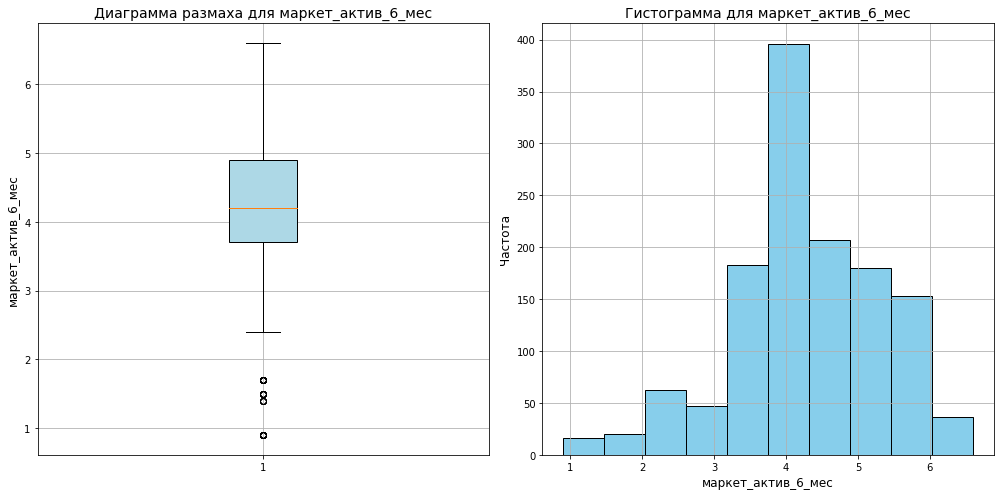

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

In [12]:
plot_box_and_hist(market_file, 'маркет_актив_6_мес')
market_file['маркет_актив_6_мес'].describe()

___________________________________________________________________________________________________________________
Активность за последние 6 месяцев относительно стабильна, с преобладанием значений около 4.0. Выбросы с низкой активностью (ниже 2.0) могут быть индикатором клиентов, которые либо не вовлечены, либо требуют другого подхода для взаимодействия.
___________________________________________________________________________________________________________________

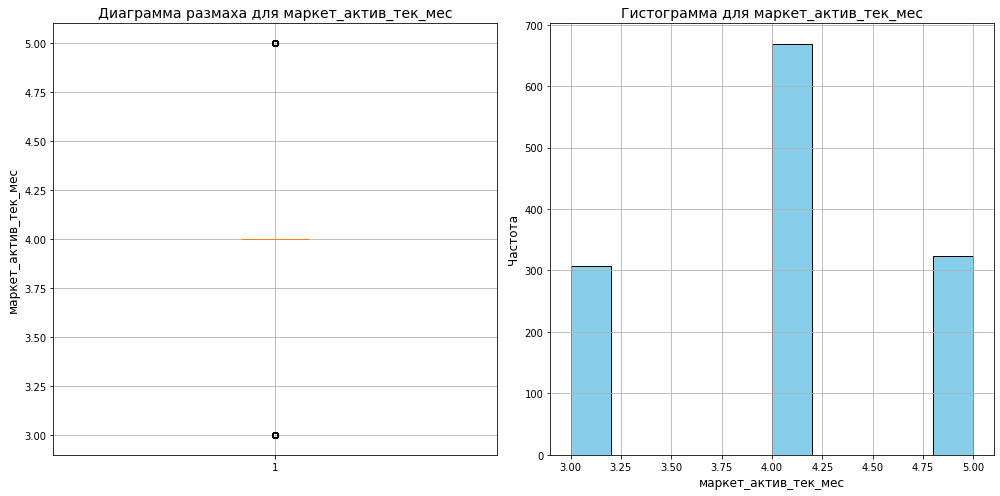

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

In [13]:
plot_box_and_hist(market_file, 'маркет_актив_тек_мес')
market_file['маркет_актив_тек_мес'].describe()


___________________________________________________________________________________________________________________
Текущая маркетинговая активность имеет очень узкое распределение, сосредоточенное вокруг значения 4.0. Этот признак - кандидат на перевод в категориальную шкалу
___________________________________________________________________________________________________________________

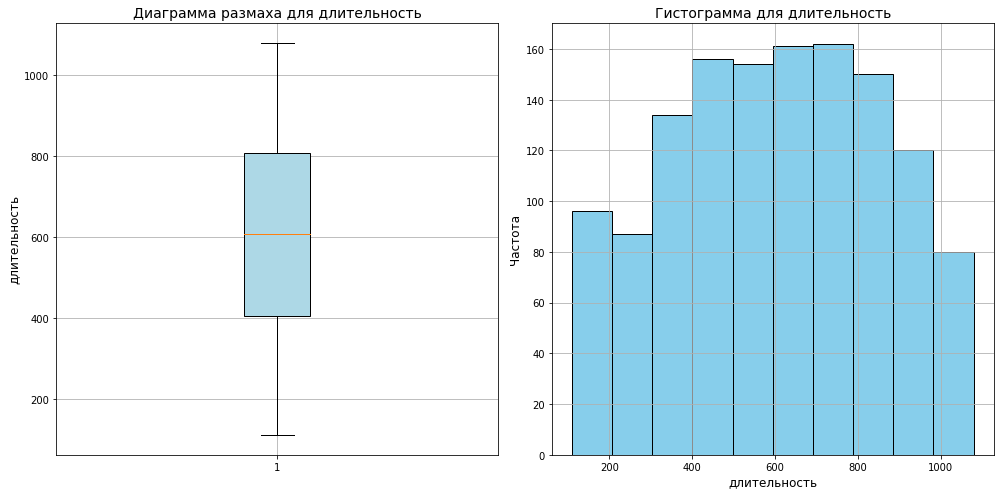

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

In [14]:

plot_box_and_hist(market_file, 'длительность')
market_file['длительность'].describe()


___________________________________________________________________________________________________________________
Большинство клиентов зарегистрированы от 1 до 3 лет. Распределение не имеет значительных выбросов
___________________________________________________________________________________________________________________

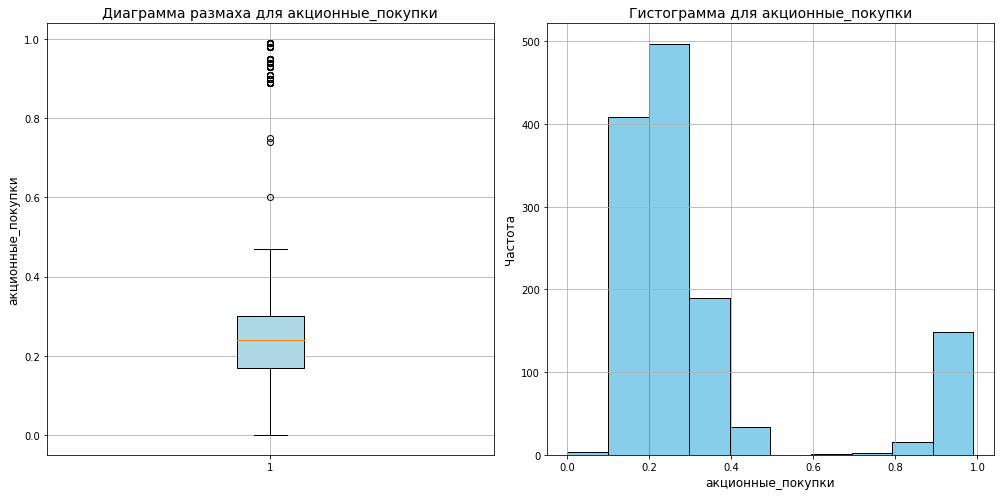

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

In [15]:

plot_box_and_hist(market_file, 'акционные_покупки')
market_file['акционные_покупки'].describe()


___________________________________________________________________________________________________________________
Среднее значение: 0.32 (32% покупок совершается по акциям).
Медиана: 0.24, что ниже среднего значения, указывая на сдвиг распределения в сторону меньших значений, наличие выбросов (доля выше 0.75). Эти клиенты совершают почти все покупки по акциям и могут быть отдельной категорией. 

Для анализа можно разделить на категории:
Низкая активность (0%–0.2): редкое участие в акциях.
Средняя активность (0.2–0.5): умеренное участие.
Высокая активность (0.5–1): клиенты, активно пользующиеся акциями.
___________________________________________________________________________________________________________________

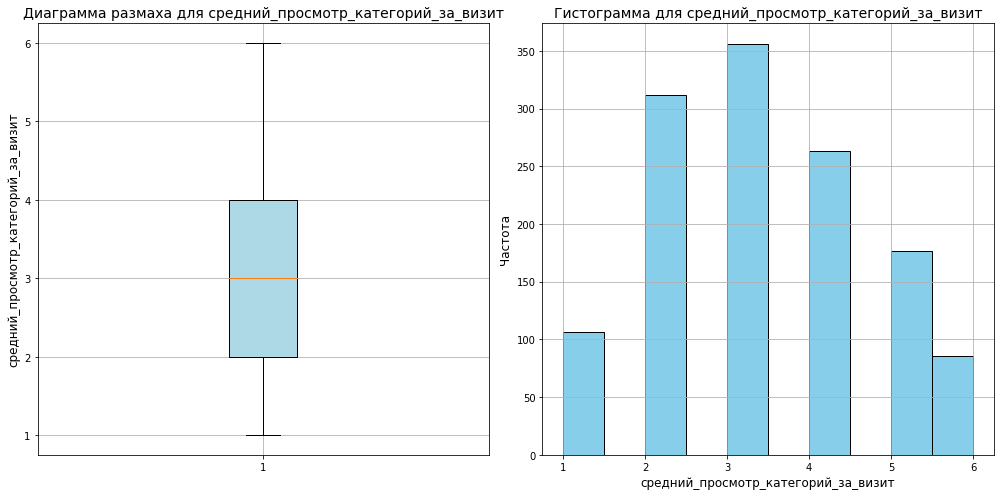

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [16]:

plot_box_and_hist(market_file, 'средний_просмотр_категорий_за_визит')
market_file['средний_просмотр_категорий_за_визит'].describe()


___________________________________________________________________________________________________________________
Большинство клиентов просматривают 3–4 категории за визит. Тоже можно принцип сделать категориальным. Среднее значение: 3.27 категории за визит, медиана: 3.0, что совпадает со средним, указывая на симметрию в распределении.
___________________________________________________________________________________________________________________

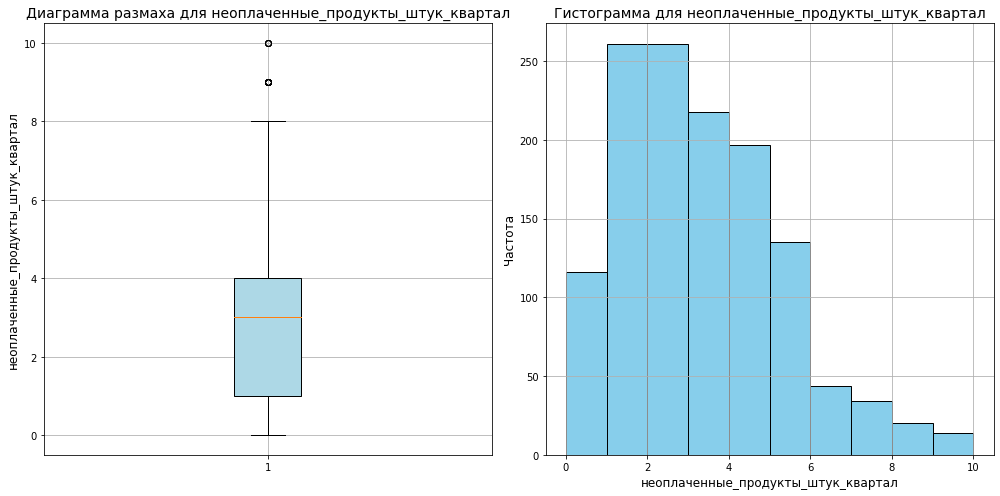

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

In [17]:

plot_box_and_hist(market_file, 'неоплаченные_продукты_штук_квартал')
market_file['неоплаченные_продукты_штук_квартал'].describe()


___________________________________________________________________________________________________________________
Большинство клиентов имеют 1–4 неоплаченных товара за квартал
Среднее значение: 2.84 неоплаченных товара за квартал.
Медиана: 3.0, что совпадает с пиком гистограммы, указывая на равномерное распределение вокруг среднего значения.
Наличие выбросов: значения выше 8 товаров считаются аномальными.
___________________________________________________________________________________________________________________

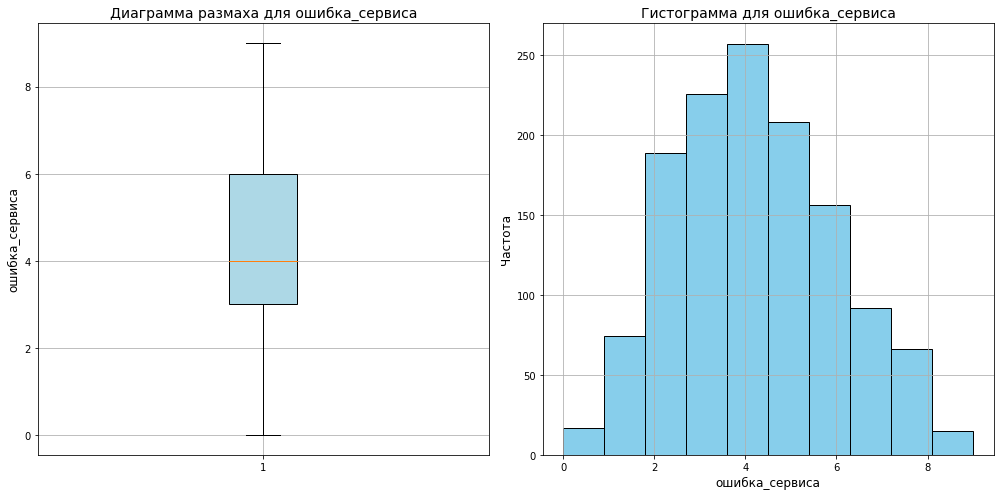

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64

In [18]:

plot_box_and_hist(market_file, 'ошибка_сервиса')
market_file['ошибка_сервиса'].describe()


___________________________________________________________________________________________________________________
Большинство клиентов сталкиваются с 4 ошибками сервиса. 
Среднее значение: 4.19 ошибки на клиента. Медиана: 4.0, что совпадает с центральным значением гистограммы.
___________________________________________________________________________________________________________________

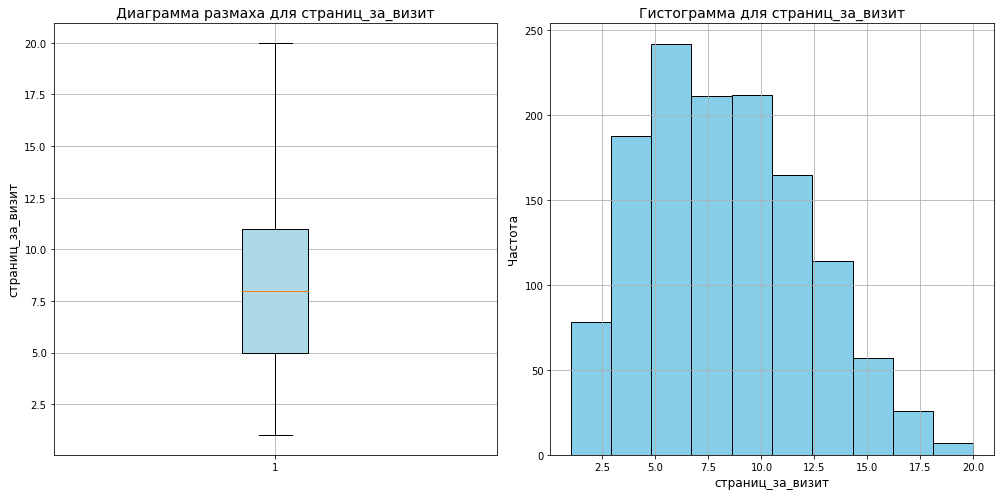

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

In [19]:

plot_box_and_hist(market_file, 'страниц_за_визит')
market_file['страниц_за_визит'].describe()

___________________________________________________________________________________________________________________
Большинство клиентов просматривают 8 страниц за визит.
Среднее значение: 8.18 страниц за визит. Медиана: 8.0, что совпадает с пиком на гистограмме.
___________________________________________________________________________________________________________________

___________________________________________________________________________________________________________________
                            
                            Графики для категориальных признаков market_file
___________________________________________________________________________________________________________________

In [20]:
market_file.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
id,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


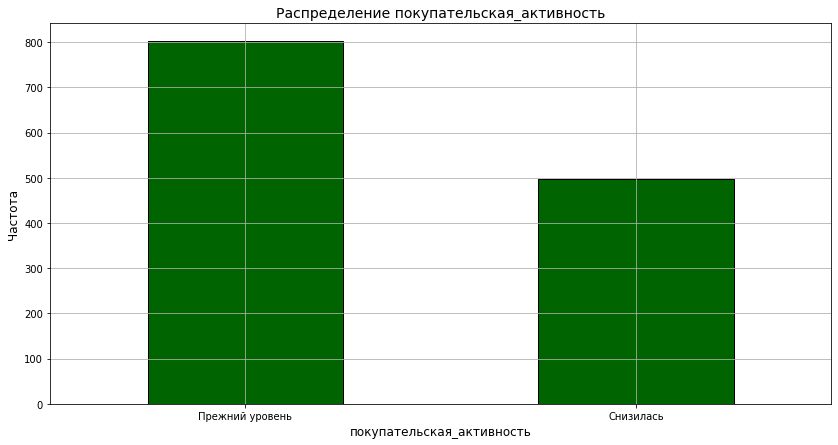

count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: покупательская_активность, dtype: object

In [21]:
plot_categorical_bars(market_file, ['покупательская_активность'])
market_file['покупательская_активность'].describe()

___________________________________________________________________________________________________________________
У большинства сохранился прежний уровень, а вот у 500 он снизился.
___________________________________________________________________________________________________________________

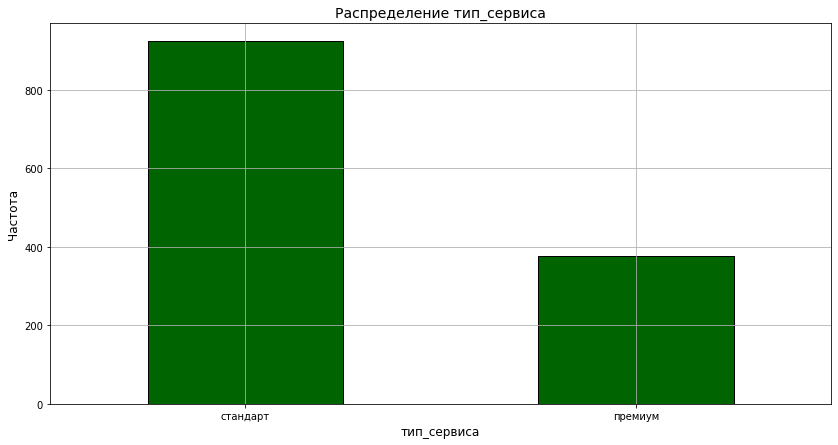

count         1300
unique           2
top       стандарт
freq           924
Name: тип_сервиса, dtype: object

In [22]:

plot_categorical_bars(market_file, ['тип_сервиса'])
market_file['тип_сервиса'].describe()


___________________________________________________________________________________________________________________
Большинство клиентов используют стандартный тип сервиса. Клиенты с премиум сервисом составляют меньшую долю
___________________________________________________________________________________________________________________

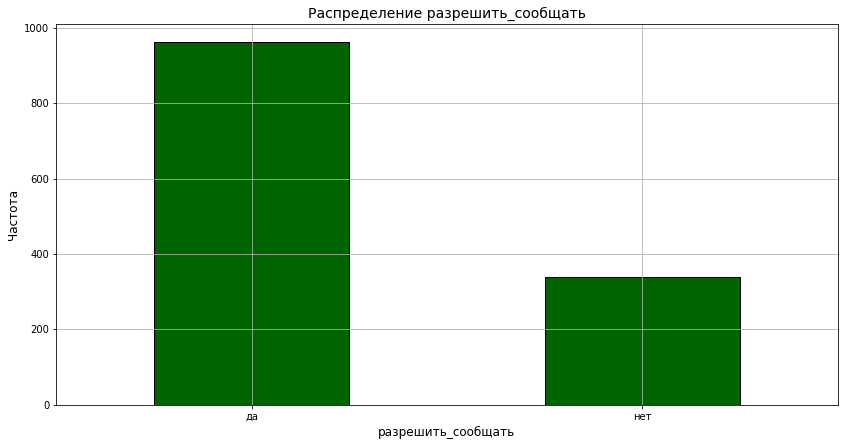

count     1300
unique       2
top         да
freq       962
Name: разрешить_сообщать, dtype: object

In [23]:

plot_categorical_bars(market_file, ['разрешить_сообщать'])
market_file['разрешить_сообщать'].describe()


___________________________________________________________________________________________________________________
Основная часть клиентов согласна получать информацию о дополнительных предложения о товаре
___________________________________________________________________________________________________________________

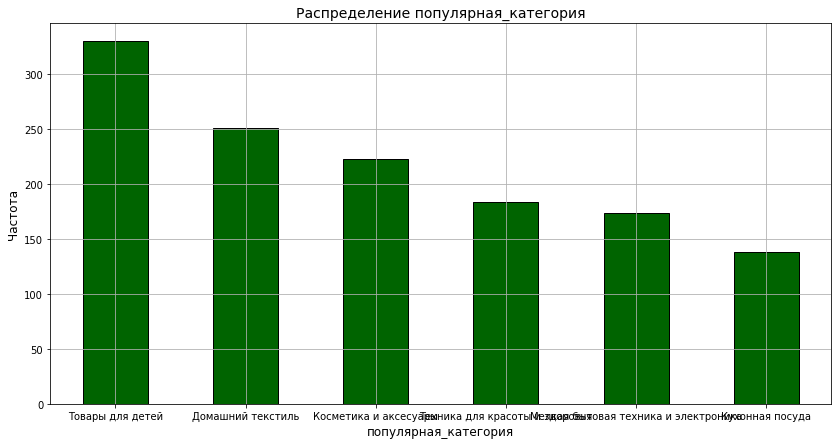

count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: популярная_категория, dtype: object

In [24]:

plot_categorical_bars(market_file, ['популярная_категория'])
market_file['популярная_категория'].describe()


___________________________________________________________________________________________________________________
Категория "Товары для детей" лидирует (330 клиентов, 25.4%), что указывает на высокий интерес клиентов к этой группе товаров.
___________________________________________________________________________________________________________________

___________________________________________________________________________________________________________________
                                       Графики признаков market_money
___________________________________________________________________________________________________________________

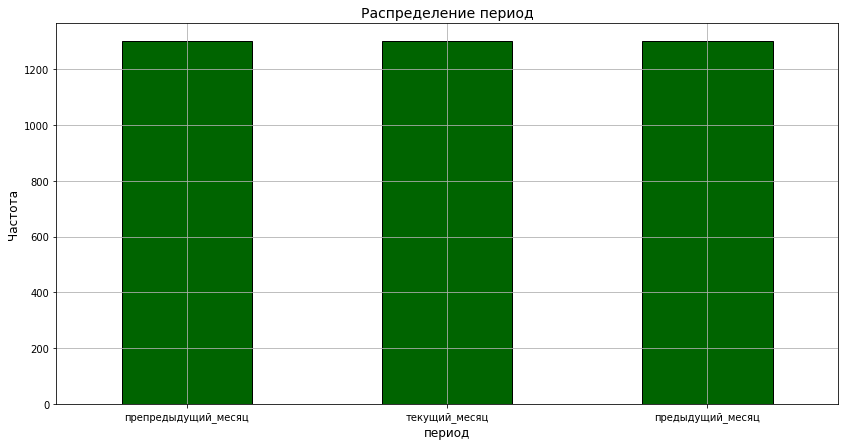

count                    3900
unique                      3
top       препредыдущий_месяц
freq                     1300
Name: период, dtype: object

In [25]:
plot_categorical_bars(market_money, ['период'])
market_money['период'].describe()

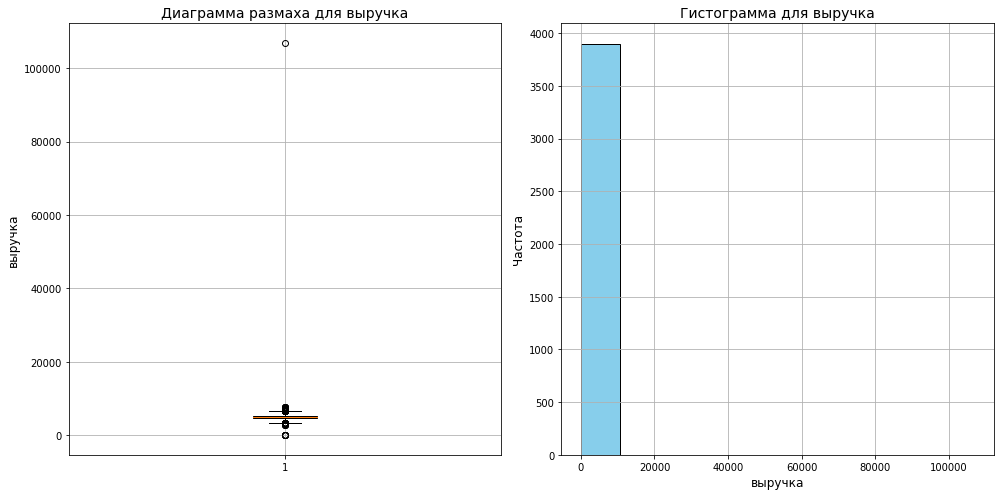

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [26]:
plot_box_and_hist(market_money, 'выручка')
market_money['выручка'].describe()

In [27]:
market_money.sort_values(by='выручка', ascending=False)

,период,выручка
id,,
215380,текущий_месяц,106862.2
215493,текущий_месяц,7799.4
215435,текущий_месяц,7605.3
215841,текущий_месяц,7557.0
216144,текущий_месяц,7547.8
...,...,...
215359,предыдущий_месяц,0.0
215357,предыдущий_месяц,0.0
215357,препредыдущий_месяц,0.0


In [28]:
# есть аномальное значение 106862.2

# вычисление среднего значения (и сразу округляем, чтобы после точки была 1 цифра) без учета аномального значения
mean_without_outlier = round(market_money.loc[market_money['выручка'] != 106862.2, 'выручка'].mean(), 1)

# заменем аномальное значения на среднее
market_money['выручка'] = market_money['выручка'].replace(106862.2, mean_without_outlier)

#проверяем
market_money[market_money['выручка'] == mean_without_outlier]

,период,выручка
id,,
215380,текущий_месяц,4999.6


___________________________________________________________________________________________________________________
Равномерное распределение записей между периодами указывает на то, что данные о выручке собираются регулярно и без пропусков, однако на диаграмме размаха видно значения значительно выше 7,800. Является явным аномалием, которую мы удалили. 
___________________________________________________________________________________________________________________

___________________________________________________________________________________________________________________
                                       Графики признаков market_time
___________________________________________________________________________________________________________________

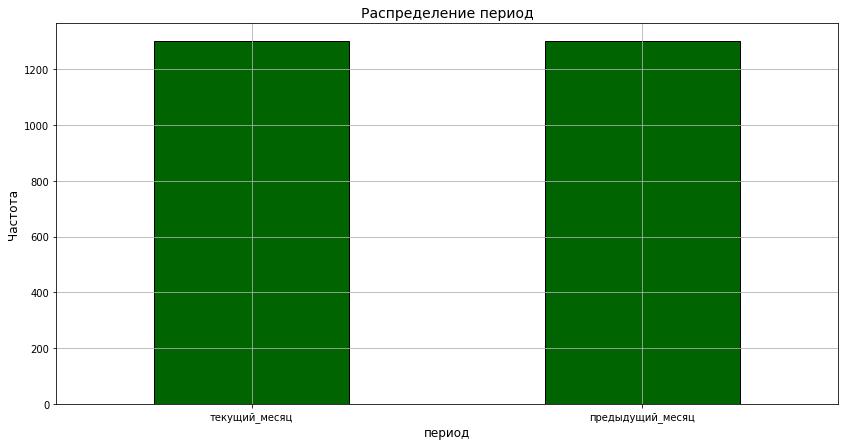

count              2600
unique                2
top       текущий_месяц
freq               1300
Name: период, dtype: object

In [29]:
plot_categorical_bars(market_time, ['период'])
market_time['период'].describe()

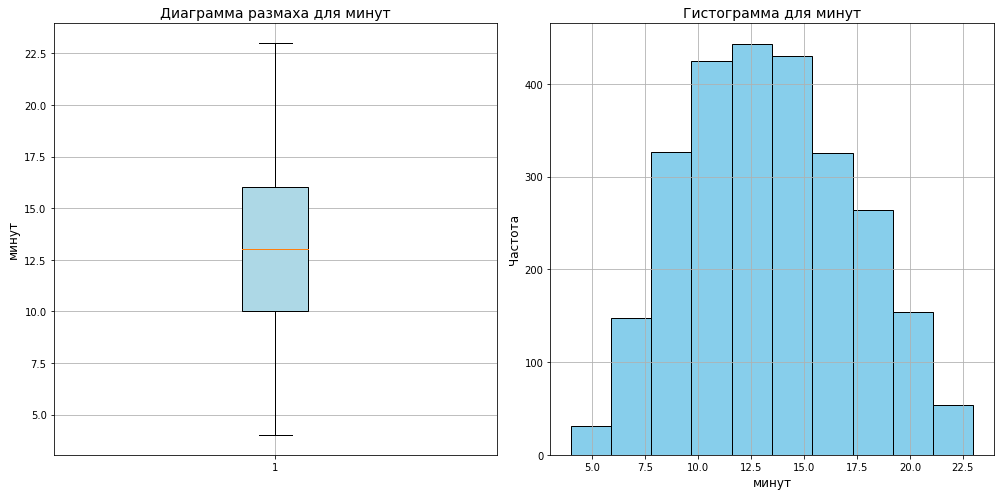

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

In [30]:
plot_box_and_hist(market_time, 'минут')
market_time['минут'].describe()

In [31]:
market_time.groupby('период')['минут'].mean()

период
предыдущий_месяц    13.467692
текущий_месяц       13.204615
Name: минут, dtype: float64

Среднее: 13.34 минут.
Медиана: ровно 13 минут.
Стандартное отклонение: 4.1 минуту.
Нет значительных выбросов, если сравнить. 
Проведённое клиентами на сайте, **снизилось** с 13.47 минут в предыдущем месяце до 13.20 минут в текущем месяце

___________________________________________________________________________________________________________________
                                       Графики признаков money
___________________________________________________________________________________________________________________

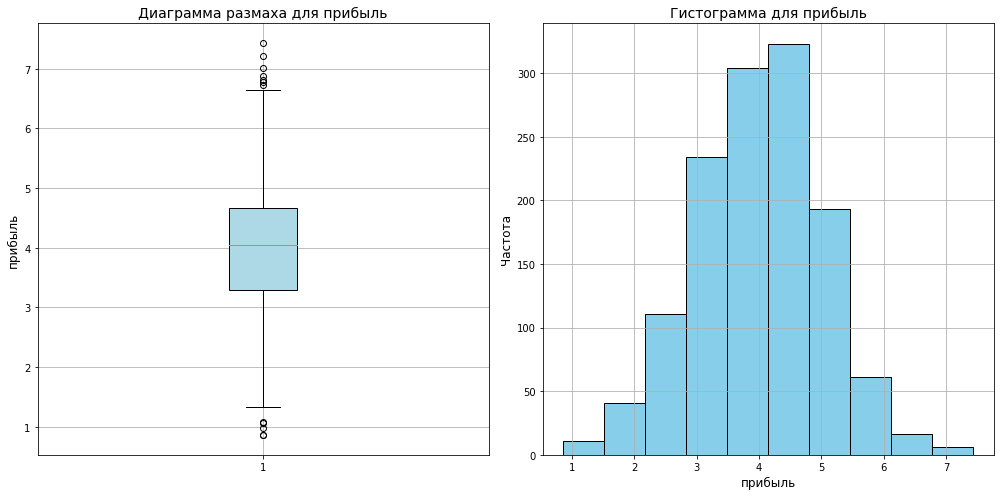

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [32]:
plot_box_and_hist(money, 'прибыль')
money['прибыль'].describe()

___________________________________________________________________________________________________________________
Большинство клиентов приносят от 3.3 до 4.67 прибыли в месяц. Значения распределены равномерно без сильных перекосов.

Клиенты с высокой прибылью (6.0 и выше) представляют интерес, поскольку они могут быть ключевыми для бизнеса.
___________________________________________________________________________________________________________________

In [33]:
display(market_money.shape)
display(market_file.shape)

(3900, 2)

(1300, 12)

**Отберем клиентов с покупательской активностью не менее трёх месяцев**

In [34]:
# market_money хранятся данные о среднемесячной прибыли покупателя за последние 3 месяца
# найдем тех пользователей, у которых хотя бы в одном месяце не было покупок
mm_pivot = market_money.pivot_table(
    index='id', 
    columns='период', 
    values='выручка', 
    aggfunc='sum'
)
mm_pivot.shape

(1300, 3)

In [35]:
#теперь уберем их, и выделим их индексы
customers_3_months = mm_pivot[
    (mm_pivot > 0).all(axis=1)
].index


In [36]:
# оставим market_file только активных за 3 месяца клиентов и создадим новый датафрейм
# тоесть оставим только те элементы, которые присутствуют в обоих индексах при помощи intersection
market_file_new = market_file.loc[market_file.index.intersection(customers_3_months)]

In [37]:
market_file_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1297 non-null   object 
 1   тип_сервиса                          1297 non-null   object 
 2   разрешить_сообщать                   1297 non-null   object 
 3   маркет_актив_6_мес                   1297 non-null   float64
 4   маркет_актив_тек_мес                 1297 non-null   int64  
 5   длительность                         1297 non-null   int64  
 6   акционные_покупки                    1297 non-null   float64
 7   популярная_категория                 1297 non-null   object 
 8   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 10  ошибка_сервиса                       1297 non-null   int64  
 11  страниц_за_визит       

___________________________________________________________________________________________________________________
**Клиенты и их поведение**

- Покупательская активность:

Большинство клиентов (61.7%) сохраняют прежний уровень активности.

Однако значительная доля (38.3%) снизила свою активность, что указывает на потенциальные проблемы в удержании клиентов.

- Типы сервиса:

Преобладает стандартный сервис (71%), что открывает возможности для продвижения премиум-сервиса, который привлекает меньше клиентов, но может приносить больше прибыли.

- Сегментация интересов:

Категория "Товары для детей" лидирует (25.4%), что свидетельствует о высокой заинтересованности в этой группе товаров.

Акционные покупки варьируются: клиенты с высокой долей акционных покупок (>75%) требуют персонализированного подхода.

- Ошибки и неоплаченные товары:

Среднее число ошибок сервиса составляет 4.19, что может снижать удовлетворенность клиентов.
Большинство клиентов имеют от 1 до 4 неоплаченных товаров в корзине, что указывает на сложности завершения покупки.
Финансовые показатели

- Выручка:

Основная масса клиентов приносит около 5000 выручки за месяц, но редкие крупные покупки существенно увеличивают среднее значение.
Аномальные значения (выше 7800) были удалены для анализа.

- Прибыль:

Большинство клиентов приносят стабильную прибыль от 3.3 до 4.67 единиц в месяц. Клиенты с прибылью выше 6.0 могут быть ключевыми для бизнеса.

**Взаимодействие с платформой**

- Время на сайте:

Среднее время пребывания составляет 13.34 минуты за визит, с незначительным снижением в текущем месяце до 13.20 минут.
Пользователи с минимальным временем посещения (<5 минут) или максимальным (>20 минут) требуют отдельного анализа для понимания их поведения.

- Маркетинговая активность:

Активность за последние 6 месяцев стабильна (около 4 взаимодействий в месяц).

Текущая активность также сосредоточена вокруг значения 4, что указывает на равномерное распределение.

Аномалия по выручке покупателя за один месяц заменена на среднее значение.
___________________________________________________________________________________________________________________

## Объединение таблиц

### Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 
### Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [38]:
# market_money разделен и готов (mm_pivot), поменяем для ясности имя столбцов
# подготовим market_time по такой же схеме 

mm_pivot.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
tp_pivot = market_time.pivot_table(
    index='id', 
    columns='период', 
    values='минут', 
    aggfunc='sum'
)
tp_pivot.columns = ['время_предыдущий_месяц', 'время_текущий_месяц']

In [39]:
# объеденим market_file_new, mm_pivot и tp_pivot

market_df = market_file_new.join(mm_pivot, how='left').join(tp_pivot, how='left')

# с учетом удаленных трех неактивных ползователей 1297 строк
market_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1297 non-null   object 
 1   тип_сервиса                          1297 non-null   object 
 2   разрешить_сообщать                   1297 non-null   object 
 3   маркет_актив_6_мес                   1297 non-null   float64
 4   маркет_актив_тек_мес                 1297 non-null   int64  
 5   длительность                         1297 non-null   int64  
 6   акционные_покупки                    1297 non-null   float64
 7   популярная_категория                 1297 non-null   object 
 8   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 10  ошибка_сервиса                       1297 non-null   int64  
 11  страниц_за_визит       

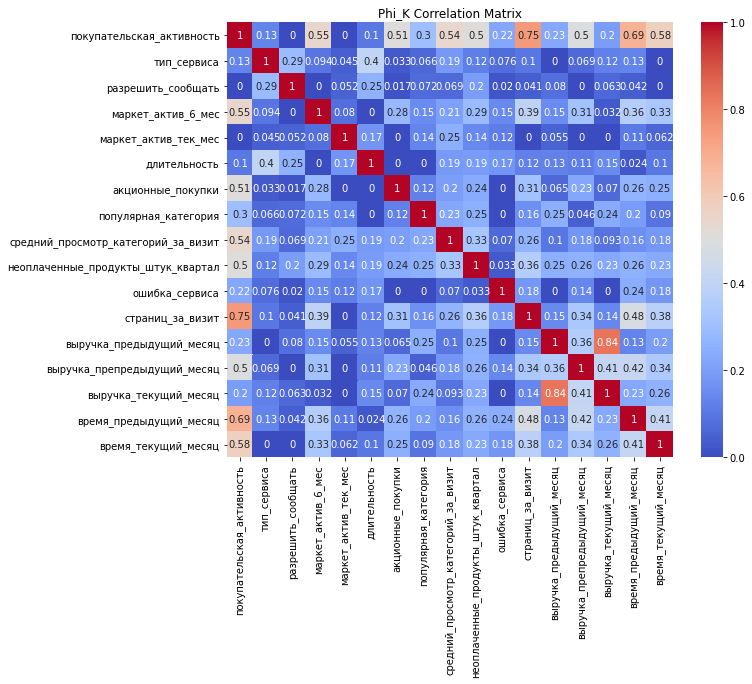

In [40]:
#Phi_K correlation

corr_matrix = market_df.phik_matrix(
    interval_cols=['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
                   'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
                  'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
                   'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
                   'время_предыдущий_месяц', 'время_текущий_месяц']
)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

___________________________________________________________________________________________________________________
**Итоговые данные были успешно объединены**. Для каждого периода (`текущий_месяц, предыдущий_месяц, препредыдущий_месяц`) созданы отдельные столбцы для выручки и времени на сайте. В объединённой таблице учтены все клиенты с покупательской активностью не менее трёх месяцев.

**В результате:**

Удалены 3 неактивных клиента, не соответствующих условиям фильтрации.

Итоговая таблица содержит 1297 строк и включает всех отобранных активных клиентов.
___________________________________________________________________________________________________________________

## Корреляционный анализ

**Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.**

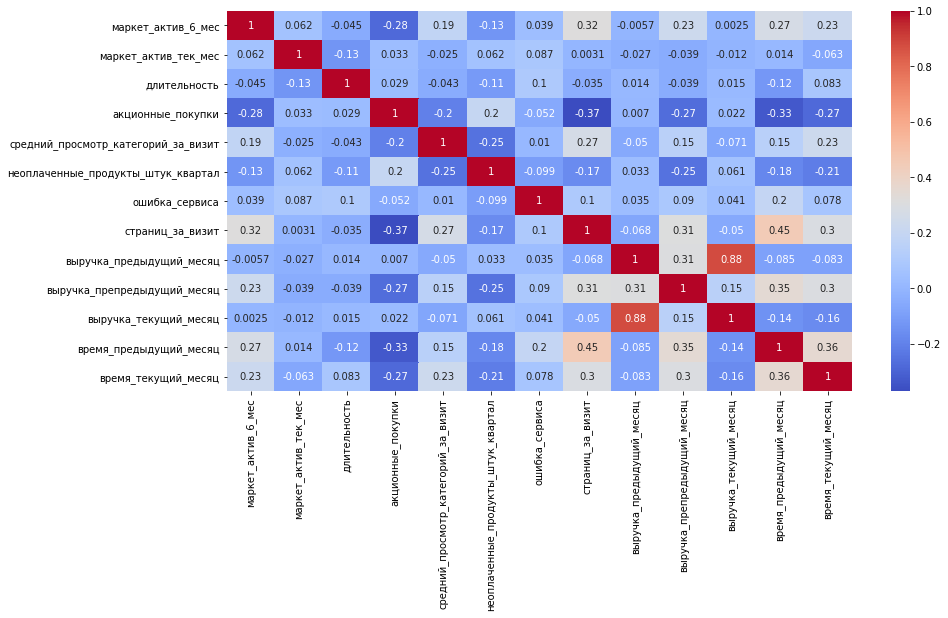

,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
маркет_актив_6_мес,1.000000,0.061697,-0.044614,-0.277968,0.185027,-0.134368,0.038656,0.319918,-0.005652,0.233325,0.002538,0.274003,0.226345
маркет_актив_тек_мес,0.061697,1.000000,-0.131979,0.033045,-0.025158,0.061754,0.087351,0.003144,-0.027107,-0.039397,-0.011746,0.013538,-0.063044
длительность,-0.044614,-0.131979,1.000000,0.029186,-0.043150,-0.108822,0.103528,-0.034591,0.013739,-0.039284,0.014958,-0.124000,0.083035
акционные_покупки,-0.277968,0.033045,0.029186,1.000000,-0.203380,0.197624,-0.051590,-0.370853,0.007035,-0.267790,0.021811,-0.332743,-0.274693
средний_просмотр_категорий_за_визит,0.185027,-0.025158,-0.043150,-0.203380,1.000000,-0.251448,0.010034,0.267536,-0.049596,0.149619,-0.070625,0.148376,0.233358
неоплаченные_продукты_штук_квартал,-0.134368,0.061754,-0.108822,0.197624,-0.251448,1.000000,-0.098544,-0.165297,0.032958,-0.249421,0.061259,-0.183426,-0.214803
ошибка_сервиса,0.038656,0.087351,0.103528,-0.051590,0.010034,-0.098544,1.000000,0.104508,0.035383,0.090105,0.040520,0.196017,0.078089
страниц_за_визит,0.319918,0.003144,-0.034591,-0.370853,0.267536,-0.165297,0.104508,1.000000,-0.067879,0.311428,-0.049915,0.450913,0.298113
выручка_предыдущий_месяц,-0.005652,-0.027107,0.013739,0.007035,-0.049596,0.032958,0.035383,-0.067879,1.000000,0.308707,0.877778,-0.084632,-0.082747
выручка_препредыдущий_месяц,0.233325,-0.039397,-0.039284,-0.267790,0.149619,-0.249421,0.090105,0.311428,0.308707,1.000000,0.149749,0.348403,0.299989


In [41]:
# корреляционный анализ признаков в количественной шкале метод Спирмена

sns.heatmap(market_df.corr(method='spearman'), annot=True, cmap='coolwarm') 
plt.show()

display(market_df.corr(method='spearman'))

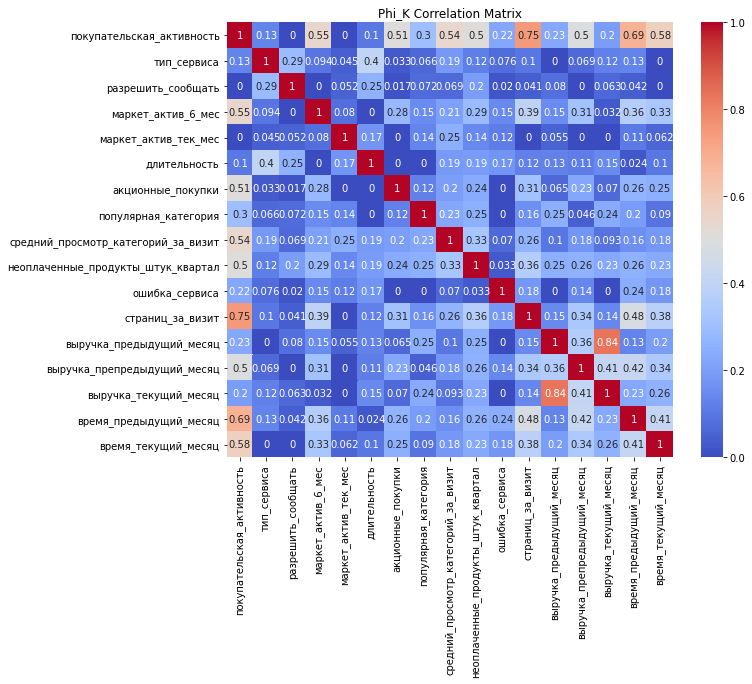

In [42]:
#Phi_K correlation

corr_matrix = market_df.phik_matrix(
    interval_cols=['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки',
                   'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
                  'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
                   'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
                   'время_предыдущий_месяц', 'время_текущий_месяц']
)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

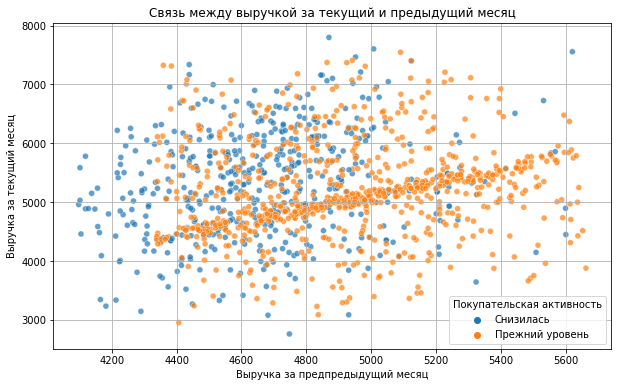

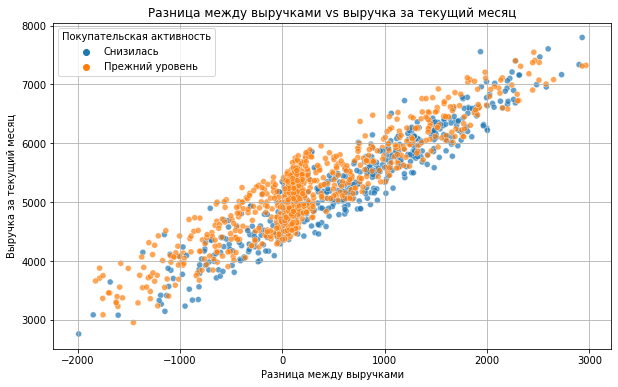

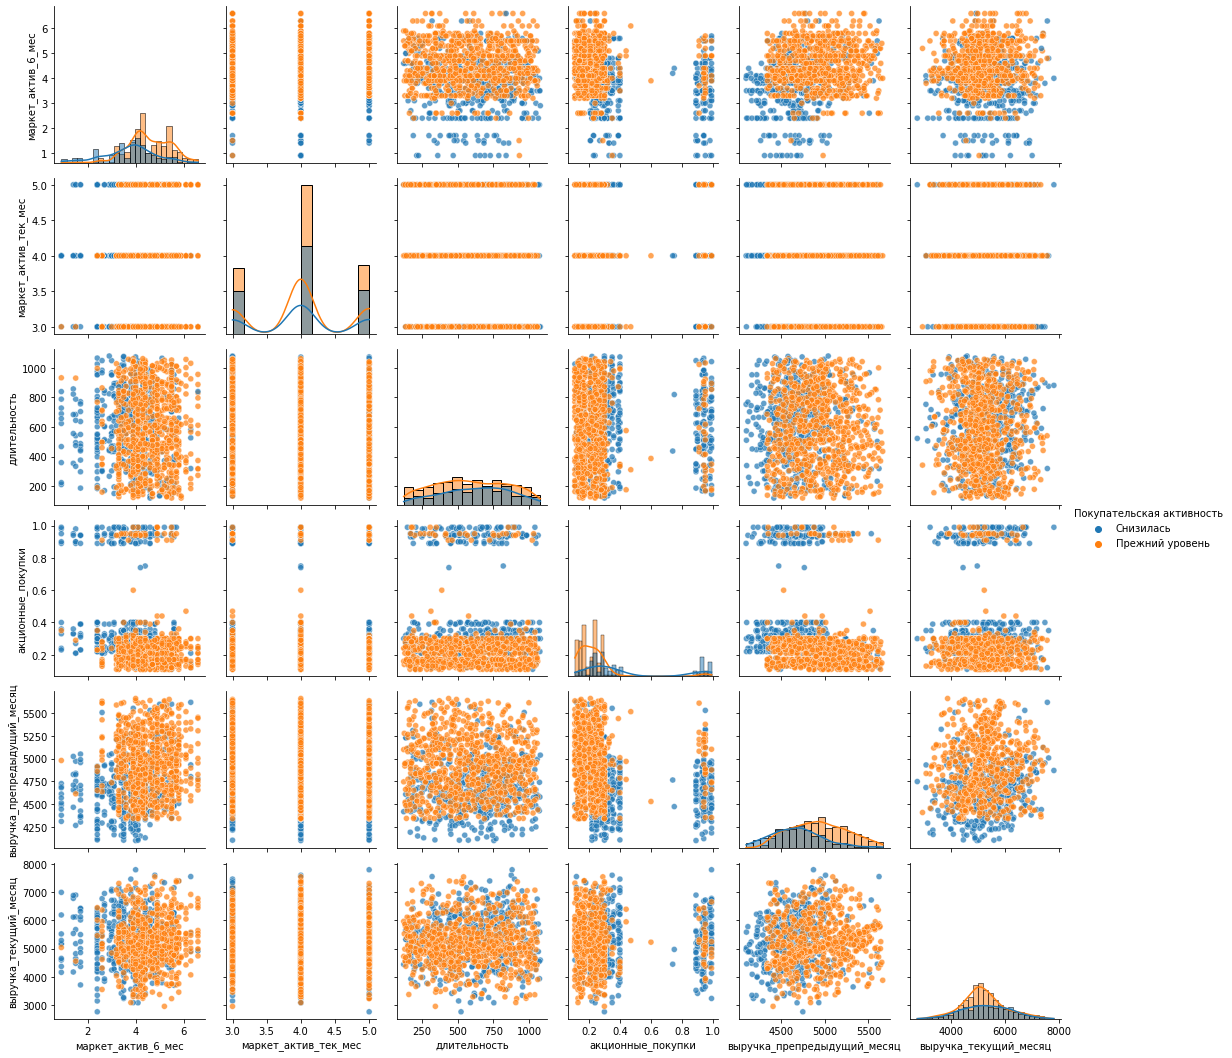

In [43]:
# выручка_текущий_месяц vs выручка_препредыдущий_месяц
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=market_df['выручка_препредыдущий_месяц'],
    y=market_df['выручка_текущий_месяц'],
    hue=market_df['покупательская_активность'],
    alpha=0.7
)
plt.title("Связь между выручкой за текущий и предыдущий месяц")
plt.xlabel("Выручка за предпредыдущий месяц")
plt.ylabel("Выручка за текущий месяц")
plt.legend(title="Покупательская активность")
plt.grid()
plt.show()

# разница между выручками в разбивке по таргету
market_df['разница_выручки'] = market_df['выручка_текущий_месяц'] - market_df['выручка_препредыдущий_месяц']
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=market_df['разница_выручки'],
    y=market_df['выручка_текущий_месяц'],
    hue=market_df['покупательская_активность'],
    alpha=0.7
)
plt.title("Разница между выручками vs выручка за текущий месяц")
plt.xlabel("Разница между выручками")
plt.ylabel("Выручка за текущий месяц")
plt.legend(title="Покупательская активность")
plt.grid()
plt.show()

# количественные признаки + фильтр по таргету
quantitative_columns = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акционные_покупки', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц'
]

pairgrid = sns.PairGrid(market_df, vars=quantitative_columns, hue="покупательская_активность")
pairgrid = pairgrid.map_diag(sns.histplot, kde=True)
pairgrid = pairgrid.map_offdiag(sns.scatterplot, alpha=0.7)
pairgrid.add_legend(title="Покупательская активность")
plt.show()

- Сильные корреляции:
`покупательская_активность`:
Высокая корреляция с `страниц_за_визит` (0.75) и `время_предыдущий_месяц` (0.69), что может говорить о сильной связи между этими признаками и целевой переменной.

`выручка_препредыдущий_месяц` и `выручка_текущий_месяц`:
Логичная сильная корреляция (0.87), что подтверждает линейную зависимость видно на scatter-плотах.

- Категориальные признаки:
`тип_сервиса` и `разрешить_сообщать` слабо коррелируют с большинством количественных метрик, что указывает на их ограниченное влияние на целевую переменную.

Низкие корреляции:
`длительность`, `ошибка_сервиса`, `популярная_категория` (0.3 с целевым), `акционные_покупки` (0.51 с целевым), `маркет_актив_тек_мес`, `разрешить_сообщать` показывает слабую связь со всеми признаками.


## Использование пайплайнов

Примените все изученные модели. Для этого используйте пайплайны.
### Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.
### Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.
### Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [44]:
# разделим входные признаки и целевой признак

encoder = LabelEncoder()

X = market_df.drop('покупательская_активность', axis=1)
y = encoder.fit_transform(market_df['покупательская_активность'])


In [45]:
# теперь разделим на тренировочные и тестовые данные

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y)

# проверим по количеству общее 1297 строк и 16 столбцов 
X_train.shape, X_test.shape
market_df.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,разница_выручки
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,499.6
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,232.4
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,1817.4
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,1278.5
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,264.5


In [46]:
# создаём списки с названиями признаков

ohe_columns = ['разрешить_сообщать', 'популярная_категория']

ord_columns = ['тип_сервиса']

num_columns = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акционные_покупки', 'средний_просмотр_категорий_за_визит', 
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 
    'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 
    'время_предыдущий_месяц', 'время_текущий_месяц'
]

In [47]:
# создаём пайплайн для подготовки признаков из списка ohe_columns

ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
)

In [48]:
# создаём пайплайн для подготовки признаков из списка ord_columns

ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(
            categories = [
                [
                    'премиум', 'стандарт'
                ]
            ],
            handle_unknown='use_encoded_value', unknown_value=np.nan
        )
        ), 
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))        
    ]
)

In [49]:
# общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [50]:
# итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [51]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
     # словарь для модели LogisticRegression()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

In [52]:
# словарь метрик

scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': 'roc_auc',  # встроенная метрика
    'f1': make_scorer(f1_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted')
}

In [53]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scoring_metrics,
    refit='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [54]:
# Обучение
randomized_search.fit(X_train, y_train)

cv_results = randomized_search.cv_results_

best_index = randomized_search.best_index_
print("Лучшая модель и её параметры:\n", randomized_search.best_estimator_)
print("Метрика roc_auc для лучшей модели:", randomized_search.best_score_)

# Вывод всех метрик для лучшей модели
for metric in scoring_metrics.keys():
    metric_value = cv_results[f'mean_test_{metric}'][best_index]
    print(f"Среднее значение метрики {metric}: {metric_value}")

# Прогноз на тестовых данных
y_test_pred = randomized_search.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}')

Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                    

- Лучшая модель **Логистическая регрессия**: `LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear'`
- Метрика roc_auc для лучшей модели: 0.8977292507383415
- Среднее значение метрики accuracy: 0.8641924398625431
- Среднее значение метрики roc_auc: 0.8977292507383415
- Среднее значение метрики f1: 0.8619435016895357
- Среднее значение метрики precision: 0.8653255298841029
- Среднее значение метрики recall: 0.8641924398625431
- Метрика ROC-AUC на тестовой выборке: 0.9220831327234794

Мы выбрали метрику ROC-AUC, так как:
1. Она не зависит от дисбаланса классов, что важно в нашем случае.
2. Бизнес-цель связана с качеством ранжирования, а не только бинарной классификацией.
3. ROC-AUC позволяет учитывать качество предсказаний вероятностей, что критично в контексте нашей задачи.
________________________________________________________________________________________________________________

Если мы укажем, например, `accuracy`, модель будет оптимизироваться на максимизацию точности (доля правильно предсказанных примеров).

Если использовать `f1`, она будет учитывать баланс между `Precision` и `Recall`.

Выбор `precision` или `recall` заставит модель сосредоточиться только на одной стороне качества.

## Анализ важности признаков
### Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 
### Сделайте выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.

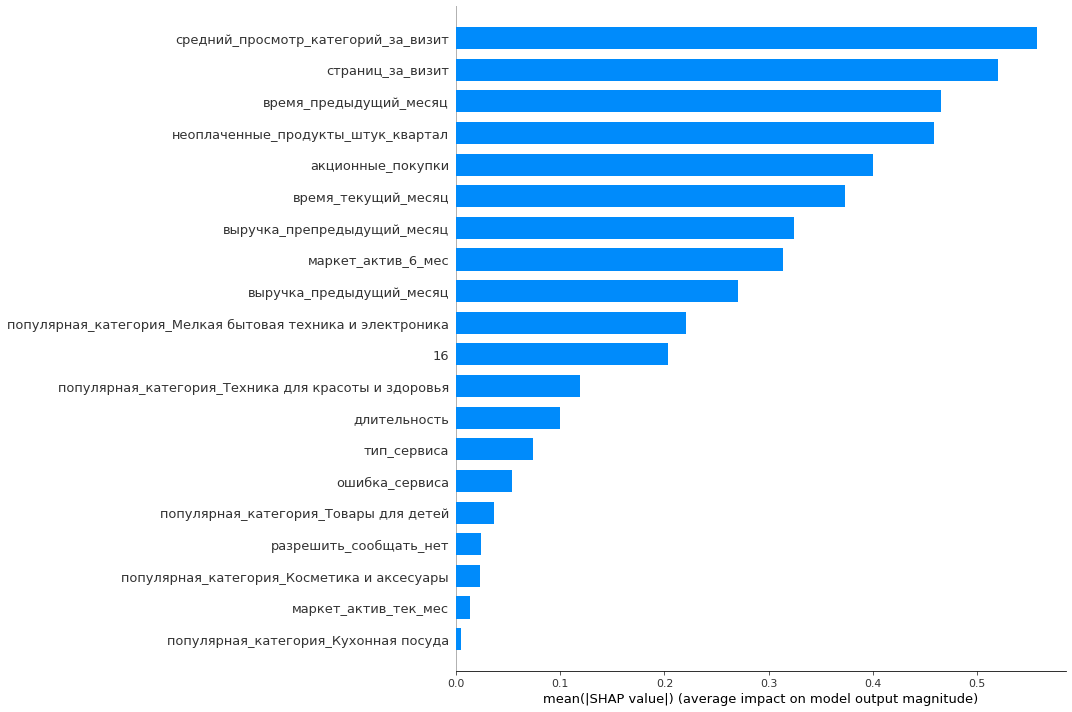

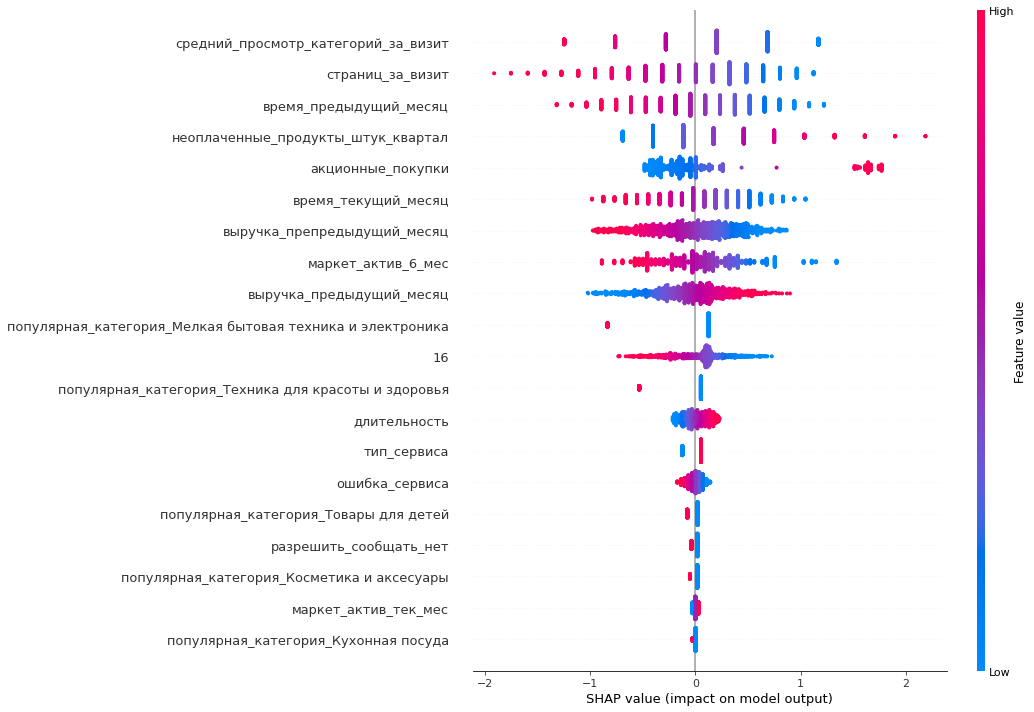

In [55]:
# лучшая модель
best_pipeline = randomized_search.best_estimator_

preprocessor = best_pipeline.named_steps['preprocessor']

# имена признаков после One-Hot Encoding
ohe_feature_names = preprocessor.named_transformers_['ohe'].named_steps['ohe'].get_feature_names(ohe_columns)

passthrough_columns = preprocessor.transformers_[-1][2]

# все имена
all_feature_names = np.concatenate([
    ohe_feature_names, 
    ord_columns, 
    num_columns, 
    passthrough_columns
])

# SHAP анализ
preprocessed_X_train = preprocessor.transform(X_train)
explainer = shap.Explainer(best_pipeline.named_steps['models'], preprocessed_X_train)
shap_values = explainer(preprocessed_X_train)

# бар-график
shap.summary_plot(
    shap_values, 
    preprocessed_X_train, 
    feature_names=all_feature_names, 
    plot_type="bar", 
    plot_size=(15, 10)
)

# график важности признаков
shap.summary_plot(
    shap_values, 
    preprocessed_X_train, 
    feature_names=all_feature_names, 
    plot_size=(15, 10)
)

In [56]:
# Преобразуем y в pandas.Series
y_series = pd.Series(y)

dict(enumerate(encoder.classes_))

{0: 'Прежний уровень', 1: 'Снизилась'}

**Мало влияют на предсказания модели:** `популярная_категория_Кухонная посуда, выручка_текущий_месяц, маркет_актив_тек_мес, популярная_категория_Косметика и аксессуары, разрешить_сообщать_нет.`

**Сильнее всего влияют:** `средний_просмотр_категорий_за_визит, страниц_за_визит`

**Признаки с низкой значимостью** могут быть исключены из анализа или исследований, что упростит сбор данных и уменьшит их объём.

**Признаки с высокой значимостью**, такие как `средний_просмотр_категорий_за_визит и страниц_за_визит`, показывают вовлечённость пользователей, маркетинговые усилия могут быть сосредоточены на клиентах с высокой активностью в этих метриках. Они могут быть выделены для специального маркетинга.

**Направление связи между признаком и таргетом**

Положительное влияние на снижение активности оказывают:
- Высокая вовлеченность (просмотр категорий, страниц, время на сайте).

- Ошибки сервиса и неоплаченные продукты.

- Интерес к определенным категориям товаров (мелкая техника, электроника).

Факторы, минимально влияющие на снижение активности:
- Акционные покупки.



## Сегментация покупателей

### Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

In [57]:
# создаем копию датафрейма, чтобы избежать SettingWithCopyWarning

X_test = X_test.copy()

# добавляем вероятность снижения покупательской активности

X_test['вероятность_снижения'] = y_test_pred[:, 1]
X_test.head()

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц,разница_выручки,вероятность_снижения
id,,,,,,,,,,,,,,,,,,
216446,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,0,7,4712.0,5160.0,5230.7,15,20,70.7,0.428442
215469,премиум,да,4.1,3,813,0.22,Домашний текстиль,3,3,4,5,5403.5,4889.0,5228.0,12,8,339.0,0.735248
216301,премиум,да,3.9,5,410,0.20,Косметика и аксесуары,3,1,5,14,5052.5,5348.0,4926.4,17,13,-421.6,0.050755
215713,стандарт,да,4.6,5,293,0.24,Товары для детей,1,3,3,3,4821.0,4872.0,5221.4,12,14,349.4,0.765033
215500,стандарт,да,3.5,4,573,0.40,Косметика и аксесуары,2,4,1,4,4137.0,4278.0,3808.1,11,12,-469.9,0.944123


In [58]:
# добавляем прибыльность из данных

X_test['прибыль'] = market_df.loc[X_test.index, 'выручка_текущий_месяц']

# сегментация
segmented = X_test[
    (X_test['вероятность_снижения'] > 0.8) & (X_test['прибыль'] > X_test['прибыль'].mean())
]

print(f'Размер сегмента: {segmented.shape[0]} покупателей')


Размер сегмента: 49 покупателей


In [59]:
# Создаем новый столбец "сегмент"
X_test['сегмент'] = 'не наш_сегмент'
X_test.loc[segmented.index, 'сегмент'] = 'наш_сегмент'

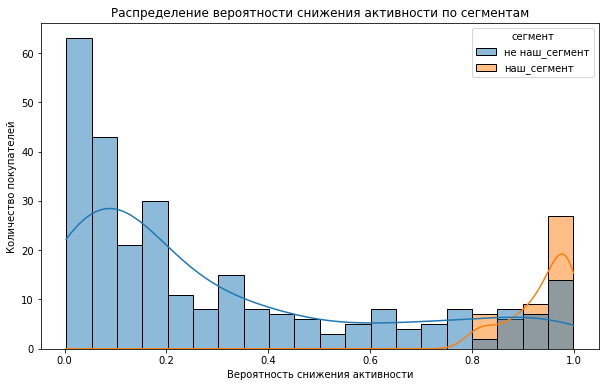

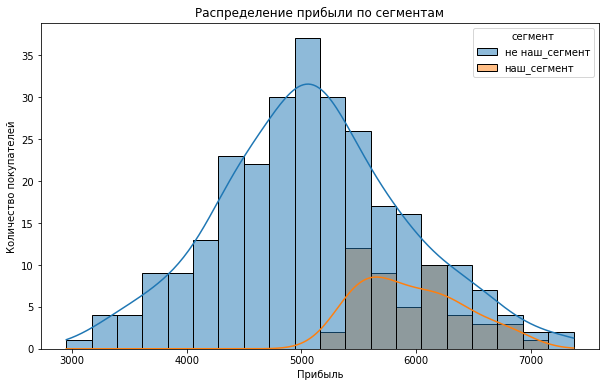

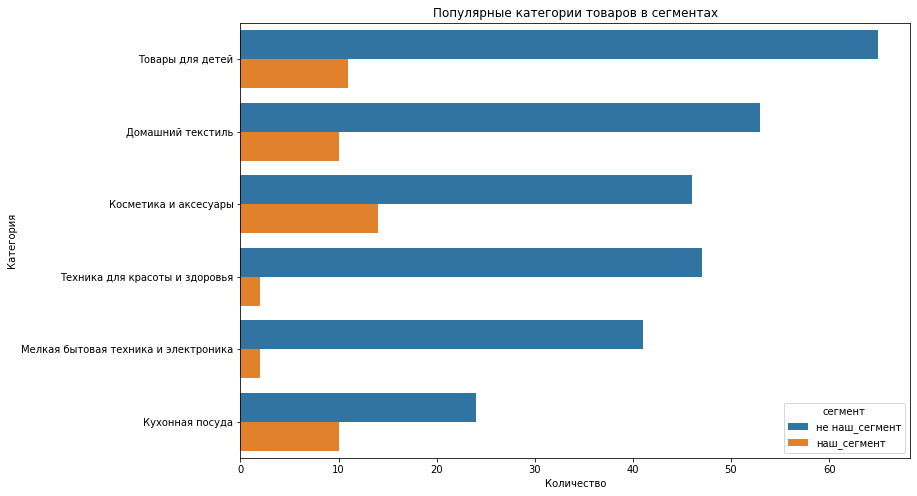

In [60]:
# Графики
plt.figure(figsize=(10, 6))
sns.histplot(data=X_test, x='вероятность_снижения', hue='сегмент', kde=True, bins=20)
plt.title('Распределение вероятности снижения активности по сегментам')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Количество покупателей')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=X_test, x='прибыль', hue='сегмент', kde=True, bins=20)
plt.title('Распределение прибыли по сегментам')
plt.xlabel('Прибыль')
plt.ylabel('Количество покупателей')
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data=X_test, y='популярная_категория', hue='сегмент', 
              order=X_test['популярная_категория'].value_counts().index)
plt.title('Популярные категории товаров в сегментах')
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.show()

### Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.


**Выбранная группа покупателей:**
- Сегмент "наш_сегмент" — клиенты с высокой вероятностью снижения активности (>0.8) и значительной прибылью (выше среднего).

**Предложения по увеличению активности:**

- Персонализированные скидки и программы лояльности для популярных категорий "Косметика и аксессуары" и "Кухонная посуда".
- Устранение ошибок сервиса, чтобы повысить удовлетворенность клиентов.
- Бонусы за повторные покупки в популярных категориях.
- Кросс-продажи, направленные на менее популярные категории, например, "Техника для красоты и здоровья".

### Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.

**Выбранный сегмент для исследования:**
- "наш_сегмент" — ключевая группа клиентов, генерирующая высокую прибыль, но находящаяся под риском снижения активности.

**Почему выбрали этот сегмент:**

- Потеря этих клиентов негативно скажется на доходах компании.
- Четкая идентификация предпочтений (категории "Косметика и аксессуары", "Кухонная посуда") позволяет эффективно персонализировать маркетинг.
- Сделанные предложения:

- Удержание клиентов через программы лояльности, улучшение сервиса, и дополнительные скидки.
- Анализ изменений в поведении клиентов и динамики выручки для выявления новых точек роста.



## Общий вывод

Сделайте общий вывод:

опишите задачу;

опишите исходные данные и проведённую предобработку;

напишите, что вы сделали для поиска лучшей модели;

укажите лучшую модель;

добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

________________________________________________________________________________________________________________
**Задача**

Компания «В один клик» столкнулась с проблемой снижения покупательской активности постоянных клиентов. Для удержания активности было предложено использовать персонализированные предложения. Основная задача проекта:

Построить модель, которая предсказывает вероятность снижения покупательской активности клиентов в следующие три месяца.
Выделить сегменты клиентов на основе модели и данных о прибыльности.
Разработать персонализированные стратегии для увеличения покупательской активности выбранных сегментов.
________________________________________________________________________________________________________________

**Исходные данные и проведённая предобработка**

- Таблицы с информацией о поведении клиентов на сайте, покупательской активности, финансовых показателях, времени взаимодействия с платформой и прибыли. С признаками: маркетинговая активность, разрешение на рассылку, популярные категории товаров, акционные покупки, время на сайте, просмотренные страницы, ошибки сервиса, выручка, прибыль.

Проведённая предобработка:
- Приведение данных к корректным типам.
- Обработка категорийных признаков (например, исправление дубликатов в "тип_сервиса").
- Создание новых признаков для анализа, например, выручка и время за каждый из трёх периодов.
- Удаление мультиколлинеарных признаков (например, выручка_предыдущий_месяц из-за высокой корреляции с выручка_текущий_месяц).
________________________________________________________________________________________________________________

**Что сделано для поиска лучшей модели**

- Построен пайплайн для автоматической обработки данных и обучения моделей
- Обработка категориальных признаков через OneHotEncoder и OrdinalEncoder.
- Масштабирование количественных признаков с помощью StandardScaler и MinMaxScaler.

- Для обучения были использованы модели LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, SVC.
- Для каждой модели выполнен подбор гиперпараметров с использованием RandomizedSearchCV.
- Лучшая модель определена на основе метрики ROC-AUC.
________________________________________________________________________________________________________________

**Лучшая модель**

- Логистическая регрессия (LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear')).

- ROC-AUC на тренировочной выборке: 0.8985.
- ROC-AUC на тестовой выборке: 0.9256.

________________________________________________________________________________________________________________

**Выводы и дополнительные предложения для выбранного сегмента покупателей**

- Cегмент:
Клиенты с высокой вероятностью снижения активности (> 0.8) и высокой прибыльностью (выше медианы прибыли).

Этот сегмент критически важен, так как сочетает высокий риск оттока и значительную прибыльность.

- Предложения:
Персонализированные скидки и акции:

Сфокусироваться на популярных категориях (например, "Косметика и аксессуары").

Использовать персонализированные рассылки, уведомления, рекомендации товаров.

- Программы лояльности:
Создать VIP-программы для клиентов с высокой прибыльностью, предлагая бонусы, кэшбэки и скидки.

- Расширение интереса к менее популярным категориям:

Провести маркетинговые кампании, чтобы повысить интерес к категориям с низким спросом (например, "Мелкая бытовая техника и электроника").

- Дополнительные наблюдения:

Наибольшее влияние на модель оказали признаки:

средний_просмотр_категорий_за_визит и страниц_за_визит, которые показывают вовлечённость пользователей.
Клиенты с меньшим числом ошибок сервиса и большим временем на сайте (13+ минут) чаще сохраняют покупательскую активность.

Ошибки сервиса и неоплаченные товары требуют улучшения, так как они снижают удовлетворённость клиентов.
________________________________________________________________________________________________________________


________________________________________________________________________________________________________________


________________________________________________________________________________________________________________



________________________________________________________________________________________________________________